<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JuanMelendres/blob/main/Actividad_Semanal_6_Visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad Semanal -- 6, Visualización**

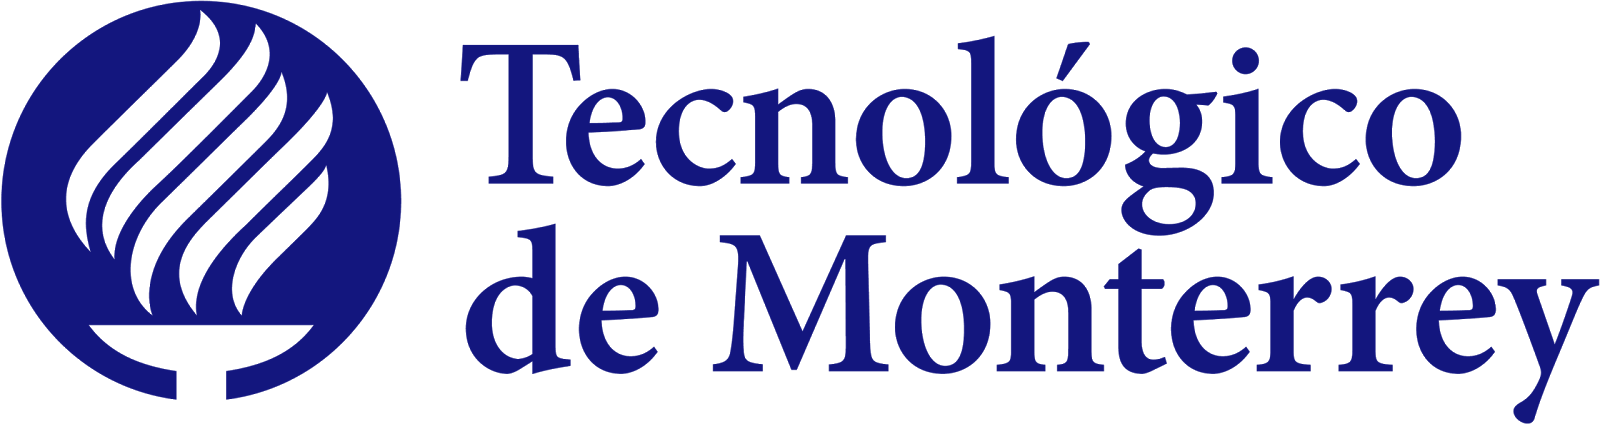

*   **Alumno:** Juan Antonio Melendres Villa
*   **Matrícula:** A00369017
*   **Materia:** Ciencia y analítica de datos (Gpo 10)
*   **Profesor:** María de la Paz Rico Fernández.
*   **Fecha:** 01 de Noviembre de 2022

**Sigue las instrucciones y desarrolla en un cuaderno en Jupyter o Google Colab (o IDE de tu preferencia) cada uno de los puntos indicados para completar y documentar la actividad con el conjunto de datos proporcionado.**

Visualización de los datos

Considera los siguientes artículos para desarrollar tu actividad:

Shanthababu, P. (2021). Effective Data Visualization Techniques in Data Science Using Python. Analytics Vidhya. Recuperado de: https://www.analyticsvidhya.com/blog/2021/08/effective-data-visualization-techniques-in-data-science-using-python/Enlaces

Rajbangshi, A. (2020). Importance of Data Storytelling in Data Science. Artificial Intelligence in Plain English. Recuperado de: https://ai.plainenglish.io/importance-of-data-storytelling-in-data-science-494f49273027Enlaces

Das, A. (2020). Data Visualization in Data Science. Towards Data Science. Recuperado de: https://towardsdatascience.com/data-visualization-in-data-science-5681cbdde5bf

# **Descripción el conjunto de datos**

Información del conjunto de datos:

Esta investigación apuntó al caso de los pagos predeterminados de los clientes en Taiwán y compara la precisión predictiva de la probabilidad de incumplimiento entre seis métodos de minería de datos. Desde la perspectiva de la gestión de riesgos, el resultado de la precisión predictiva de la probabilidad de incumplimiento estimada será más valioso que el resultado binario de la clasificación: clientes creíbles o no creíbles. Debido a que se desconoce la probabilidad real de incumplimiento, este estudio presenta el novedoso "Método de suavizado de clasificación" para estimar la probabilidad real de incumplimiento. Con la probabilidad real de incumplimiento como variable de respuesta (Y) y la probabilidad predictiva de incumplimiento como variable independiente (X), el resultado de la regresión lineal simple (Y = A + BX) muestra que el modelo de pronóstico producido por la red neuronal artificial tiene el coeficiente de determinación más alto; su intersección de regresión (A) es cercana a cero y el coeficiente de regresión (B) a uno. Por lo tanto, entre las seis técnicas de minería de datos, la red neuronal artificial es la única que puede estimar con precisión la probabilidad real de incumplimiento.

Información de atributos:

Esta investigación empleó una variable binaria, pago por defecto (Sí = 1, No = 0), como variable de respuesta. Este estudio revisó la literatura y utilizó las siguientes 23 variables como variables explicativas:
X1: Monto del crédito otorgado (dólar NT): incluye tanto el crédito de consumo individual como su crédito familiar (complementario).
X2: Género (1 = masculino; 2 = femenino).
X3: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros).
X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).
X5: Edad (año).
X6 - X11: Historial de pagos pasados. Hicimos un seguimiento de los registros de pagos mensuales pasados ​​(de abril a septiembre de 2005) de la siguiente manera: X6 = el estado de pago en septiembre de 2005; X7 = el estado de pago en agosto de 2005; . . .;X11 = estado de amortización en abril de 2005. La escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.
X12-X17: Importe del estado de cuenta (dólares NT). X12 = monto del estado de cuenta en septiembre de 2005; X13 = monto del estado de cuenta en agosto de 2005; . . .; X17 = monto del estado de cuenta en abril de 2005.
X18-X23: Monto del pago anterior (dólares NT). X18 = monto pagado en septiembre de 2005; X19 = monto pagado en agosto de 2005; . . .;X23 = monto pagado en abril de 2005.

Documentos relevantes:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

Solicitud de citación:

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

# 1.**Descarga los datos y carga el dataset en tu libreta.**

In [1]:
# Importamos las Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline 

In [2]:
# Importamos el dataset
path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [3]:
# Creamos el dataset
df = pd.read_csv(path, index_col = 0)
df.index.name = None
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


# 2.**Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()**

In [4]:
df.shape

(30000, 24)

In [5]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [6]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [7]:
df.dtypes

X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

In [9]:
df.isnull().values.any()

True

In [10]:
df.isna().any()

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

# 3.**Limpia los datos eliminando los registros nulos o rellena con la media de la columna.**

In [11]:
# Hacemos una copia de nuestro data set
ndf = df.copy()

In [12]:
# Limpiamos los datos del genero X2
print(ndf['X2'].unique())
# Sacamos la moda de X2
mode = ndf['X2'].mode()
print(mode[0])
# Sustituimos nuestro valores vacios con la moda en X2
ndf['X2'].replace(np.nan, mode[0], inplace = True)

[ 2.  1. nan]
2.0


In [13]:
# Limpiamos los datos de Educación X3
print(ndf['X3'].unique())
# Eliminamos valores mayores a 4 en X3 
X3_values = []
for i in range(0, len(ndf.index)):
  if ndf['X3'].iloc[i] > 4:
    if ndf['X3'].iloc[i] not in X3_values:
      X3_values.append(int(ndf['X3'].iloc[i]))
for i in X3_values:
  ndf['X3'].replace(i, 4, inplace = True)

[ 2.  1.  3.  5.  4.  6.  0. nan]


In [14]:
# Sustituimos valores de x3 de 0 por valor 4 de others
ndf['X3'].replace(0, 4, inplace = True)

In [15]:
# Sustituimos valores de 0 en X4 por por 3, ya que entra dentro de el valor 3 = others
print(ndf['X4'].unique())
ndf['X4'].replace(np.nan, 3.0, inplace = True)
ndf['X4'].replace(0, 3.0, inplace = True)

[ 1.  2.  3.  0. nan]


In [16]:
# Cambimos valores de -2 de X6 a X11 por -1
ndf.iloc[:,5:11] = ndf.iloc[:,5:11].replace(-2, -1)

In [18]:
# Cambiamos valores negativos de X12 a X24
for col in ndf.iloc[:,11:23].columns:
  ndf[col] = ndf[col].abs()

In [19]:
# Eliminamos las filas con valores nulos, que representan 42/30000
ndf.dropna(axis = 0, inplace = True)

In [20]:
# Verificamos si esta limpio el dataset
ndf.isnull().any()

X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool

In [21]:
# Hacemos una copia de nuestro data set limpio para trabajar con el
df_norm = ndf.copy()

Una vez que se tiene el DataFrame limpio procedemos a cambiar el nombre de las columnas para una mejor vizualizacion

In [22]:
columns_name = ['AMOUNT OF CREDIT', 'GENDER', 'EDUCATION', 'MARITAL STATUS', 'AGE', 
                'PAST PAYMENT 1', 'PAST PAYMENT 2', 'PAST PAYMENT 3', 'PAST PAYMENT 4', 'PAST PAYMENT 5', 'PAST PAYMENT 6',
                'BILL STATEMENT 1', 'BILL STATEMENT 2', 'BILL STATEMENT 3', 'BILL STATEMENT 4', 'BILL STATEMENT 5', 'BILL STATEMENT 6',
                'AMOUNT PAY 1', 'AMOUNT PAY 2', 'AMOUNT PAY 3', 'AMOUNT PAY 4', 'AMOUNT PAY 5', 'AMOUNT PAY 6', 'Y']
df_norm.columns = columns_name
df_norm.columns

Index(['AMOUNT OF CREDIT', 'GENDER', 'EDUCATION', 'MARITAL STATUS', 'AGE',
       'PAST PAYMENT 1', 'PAST PAYMENT 2', 'PAST PAYMENT 3', 'PAST PAYMENT 4',
       'PAST PAYMENT 5', 'PAST PAYMENT 6', 'BILL STATEMENT 1',
       'BILL STATEMENT 2', 'BILL STATEMENT 3', 'BILL STATEMENT 4',
       'BILL STATEMENT 5', 'BILL STATEMENT 6', 'AMOUNT PAY 1', 'AMOUNT PAY 2',
       'AMOUNT PAY 3', 'AMOUNT PAY 4', 'AMOUNT PAY 5', 'AMOUNT PAY 6', 'Y'],
      dtype='object')

# 4.**Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión.**

In [23]:
df_norm.describe()

,AMOUNT OF CREDIT,GENDER,EDUCATION,MARITAL STATUS,AGE,PAST PAYMENT 1,PAST PAYMENT 2,PAST PAYMENT 3,PAST PAYMENT 4,PAST PAYMENT 5,...,BILL STATEMENT 4,BILL STATEMENT 5,BILL STATEMENT 6,AMOUNT PAY 1,AMOUNT PAY 2,AMOUNT PAY 3,AMOUNT PAY 4,AMOUNT PAY 5,AMOUNT PAY 6,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.842212,1.557147,35.483443,0.074938,-0.007911,-0.030509,-0.076140,-0.115228,...,43352.650744,40400.248481,39030.921757,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.744557,0.521388,9.214319,0.990875,1.035749,1.023999,0.986597,0.940891,...,64315.324165,60778.908226,59490.613448,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2400.000000,1864.250000,1357.500000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19060.500000,18126.500000,17128.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54573.000000,50241.750000,49273.250000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [24]:
df_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AMOUNT OF CREDIT,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
GENDER,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
EDUCATION,29958.0,1.842212,0.744557,1.0,1.00,2.0,2.00,4.0
MARITAL STATUS,29958.0,1.557147,0.521388,1.0,1.00,2.0,2.00,3.0
AGE,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
PAST PAYMENT 1,29958.0,0.074938,0.990875,-1.0,-1.00,0.0,0.00,8.0
PAST PAYMENT 2,29958.0,-0.007911,1.035749,-1.0,-1.00,0.0,0.00,8.0
PAST PAYMENT 3,29958.0,-0.030509,1.023999,-1.0,-1.00,0.0,0.00,8.0
PAST PAYMENT 4,29958.0,-0.076140,0.986597,-1.0,-1.00,0.0,0.00,8.0
PAST PAYMENT 5,29958.0,-0.115228,0.940891,-1.0,-1.00,0.0,0.00,8.0


En este caso particular, podemos ver que  diferentes columnas tienen un comportamiento diferente. En particular, el rango del primero es positivo, con un valor mínimo de 10,000 y un valor máximo de 10,00,000, con una media de aproximadamente 167, 85 y una mediana de 10,000, lo que, siendo bastante similar, sugiere que la distribución es suficiente. Simétrico y hay pocas desviaciones. Para GENDER, EDUCATION y MARITAL STATUS son variables categóricas, mientras que AGE es la edad. Otros tienen valores  entre -2 y 8, valores que aparecen en la tabla con  valores mínimos y máximos.

# 5.**Realiza el conteo de las variables categóricas.**

In [25]:
cat_nom = ['GENDER', 'EDUCATION', 'MARITAL STATUS', 'PAST PAYMENT 1', 'PAST PAYMENT 2', 'PAST PAYMENT 3', 'PAST PAYMENT 4', 'PAST PAYMENT 5', 'PAST PAYMENT 6', 'Y']

for col in cat_nom:
  print(df_norm[col].value_counts(),'\n')

2.0    18095
1.0    11863
Name: GENDER, dtype: int64 

2.0    14009
1.0    10572
3.0     4909
4.0      468
Name: EDUCATION, dtype: int64 

2.0    15939
1.0    13643
3.0      376
Name: MARITAL STATUS, dtype: int64 

 0.0    14717
-1.0     8438
 1.0     3678
 2.0     2662
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: PAST PAYMENT 1, dtype: int64 

 0.0    15709
-1.0     9820
 2.0     3918
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
Name: PAST PAYMENT 2, dtype: int64 

 0.0    15742
-1.0    10012
 2.0     3811
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        2
Name: PAST PAYMENT 3, dtype: int64 

 0.0    16431
-1.0    10024
 2.0     3154
 3.0      179
 4.0       69
 7.0       57
 5.0       35
 6.0        5
 1.0        2
 8.0        2
Name: PAST PAYMENT 4, dtype: int64 

 0.0    16925
-1.0    10074
 2.0     2618
 3.0      178
 4.0       84
 7.0   

In [26]:
CategoricalColumns = df_norm[['GENDER', 'EDUCATION', 'MARITAL STATUS', 'PAST PAYMENT 1', 'PAST PAYMENT 2', 'PAST PAYMENT 3', 'PAST PAYMENT 4', 'PAST PAYMENT 5', 'PAST PAYMENT 6', 'Y']]
CategoricalColumns.head()

,GENDER,EDUCATION,MARITAL STATUS,PAST PAYMENT 1,PAST PAYMENT 2,PAST PAYMENT 3,PAST PAYMENT 4,PAST PAYMENT 5,PAST PAYMENT 6,Y
1,2.0,2.0,1.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,1.0
2,2.0,2.0,2.0,-1.0,2.0,0.0,0.0,0.0,2.0,1.0
3,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,2.0,1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0


In [27]:
df_norm.corr()

,AMOUNT OF CREDIT,GENDER,EDUCATION,MARITAL STATUS,AGE,PAST PAYMENT 1,PAST PAYMENT 2,PAST PAYMENT 3,PAST PAYMENT 4,PAST PAYMENT 5,...,BILL STATEMENT 4,BILL STATEMENT 5,BILL STATEMENT 6,AMOUNT PAY 1,AMOUNT PAY 2,AMOUNT PAY 3,AMOUNT PAY 4,AMOUNT PAY 5,AMOUNT PAY 6,Y
AMOUNT OF CREDIT,1.000000,0.024212,-0.231051,-0.110683,0.144515,-0.248323,-0.279367,-0.273825,-0.257783,-0.242601,...,0.294736,0.296131,0.292146,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567,-0.153781
GENDER,0.024212,1.000000,0.014133,-0.028613,-0.091259,-0.050078,-0.064044,-0.059052,-0.055985,-0.051864,...,-0.022334,-0.017435,-0.017372,-0.000297,-0.001517,-0.008630,-0.002369,-0.001775,-0.002911,-0.039730
EDUCATION,-0.231051,0.014133,1.000000,-0.136754,0.182458,0.107923,0.121184,0.111987,0.106567,0.093838,...,-0.006223,-0.012781,-0.013768,-0.041016,-0.032760,-0.044306,-0.040997,-0.045054,-0.044051,0.033957
MARITAL STATUS,-0.110683,-0.028613,-0.136754,1.000000,-0.411750,0.011902,0.016631,0.025712,0.024455,0.025604,...,-0.027558,-0.029173,-0.024735,-0.004377,-0.009439,-0.004110,-0.013830,-0.002870,-0.008317,-0.027783
AGE,0.144515,-0.091259,0.182458,-0.411750,1.000000,-0.029747,-0.040757,-0.044372,-0.040040,-0.044738,...,0.051972,0.049646,0.047687,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533,0.013881
PAST PAYMENT 1,-0.248323,-0.050078,0.107923,0.011902,-0.029747,1.000000,0.668138,0.545614,0.510621,0.479847,...,0.154678,0.158471,0.155340,-0.085324,-0.070298,-0.074947,-0.064778,-0.058193,-0.059200,0.348518
PAST PAYMENT 2,-0.279367,-0.064044,0.121184,0.016631,-0.040757,0.668138,1.000000,0.716303,0.604728,0.567300,...,0.187025,0.189051,0.187899,-0.107420,-0.067463,-0.068436,-0.053731,-0.045004,-0.045928,0.293571
PAST PAYMENT 3,-0.273825,-0.059052,0.111987,0.025712,-0.044372,0.545614,0.716303,1.000000,0.727229,0.629659,...,0.186076,0.187346,0.185834,-0.017600,-0.091467,-0.068524,-0.055825,-0.046132,-0.046752,0.263849
PAST PAYMENT 4,-0.257783,-0.055985,0.106567,0.024455,-0.040040,0.510621,0.604728,0.727229,1.000000,0.777790,...,0.199965,0.200248,0.198377,-0.028901,-0.018874,-0.100827,-0.060307,-0.047276,-0.038542,0.246810
PAST PAYMENT 5,-0.242601,-0.051864,0.093838,0.025604,-0.044738,0.479847,0.567300,0.629659,0.777790,1.000000,...,0.226160,0.225015,0.219998,-0.025244,-0.016844,-0.011865,-0.093990,-0.049655,-0.036981,0.236655


En est grafica podemos visualizar de mejor manera la correlacion entre todas las variables de nuestro dataset limpio.

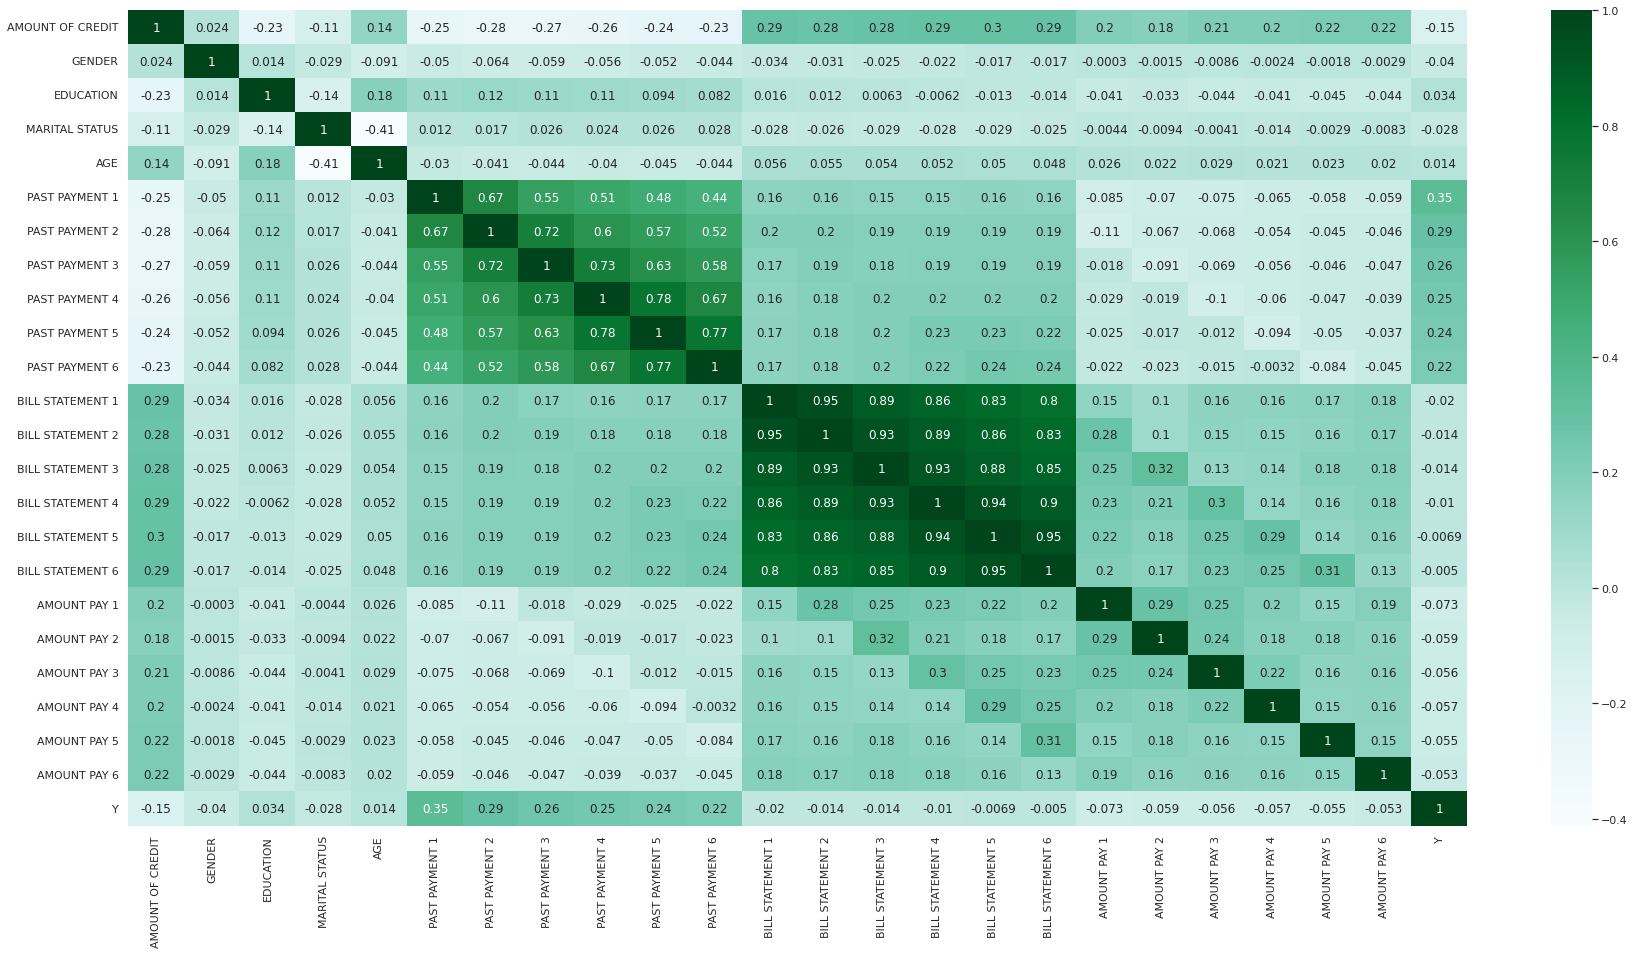

In [28]:
correlation = df_norm.corr()

sns.set(rc = {'figure.figsize': (30,15)})
sns.heatmap(correlation, annot = True, cmap = "BuGn")

# 6.**Escala los datos, si consideras necesario.**

In [29]:
df_num = df_norm.drop(CategoricalColumns, axis = 1)
df_num.head()

,AMOUNT OF CREDIT,AGE,BILL STATEMENT 1,BILL STATEMENT 2,BILL STATEMENT 3,BILL STATEMENT 4,BILL STATEMENT 5,BILL STATEMENT 6,AMOUNT PAY 1,AMOUNT PAY 2,AMOUNT PAY 3,AMOUNT PAY 4,AMOUNT PAY 5,AMOUNT PAY 6
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [30]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_num)

scaled_df_num = pd.DataFrame (scaled, columns = df_num.columns)
scaled_df_num.head()

,AMOUNT OF CREDIT,AGE,BILL STATEMENT 1,BILL STATEMENT 2,BILL STATEMENT 3,BILL STATEMENT 4,BILL STATEMENT 5,BILL STATEMENT 6,AMOUNT PAY 1,AMOUNT PAY 2,AMOUNT PAY 3,AMOUNT PAY 4,AMOUNT PAY 5,AMOUNT PAY 6
0,0.010101,0.051724,0.004057,0.003153,0.000414,0.000000,0.000000,0.000000,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.086207,0.002781,0.001753,0.001612,0.003670,0.003726,0.003391,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.224138,0.030315,0.014256,0.008148,0.016074,0.016122,0.016169,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.275862,0.048719,0.049021,0.029620,0.031757,0.031234,0.030725,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.620690,0.008934,0.005763,0.021534,0.023486,0.020650,0.019894,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


# 7.**Reduce las dimensiones con PCA, si consideras necesario.**

In [31]:
pcs = PCA()
components = pcs.fit_transform(scaled_df_num)
components.shape

(29958, 14)

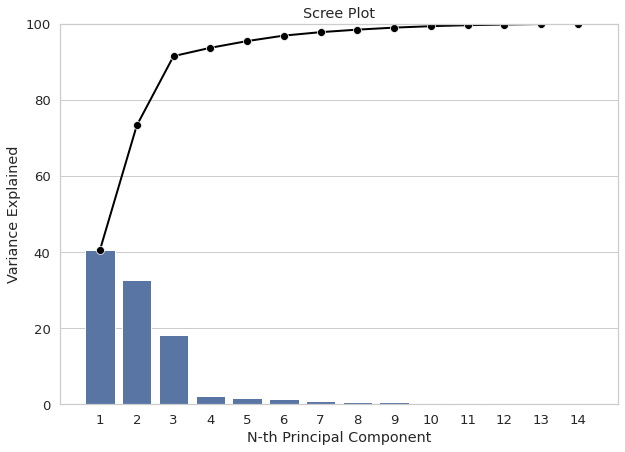

In [32]:
PC_components = np.arange(pcs.n_components_) + 1

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_*100, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_)*100, 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 100)
plt.show()

In [33]:
PC_columns = [f'PC{i}' for i in np.arange(pcs.n_components_) + 1]

In [34]:
# df con importancia característica
data = pd.DataFrame(pcs.components_, columns = PC_columns, index = scaled_df_num.columns)
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
AMOUNT OF CREDIT,0.481565,0.562157,0.313585,0.300129,0.171984,0.302137,0.271522,0.250561,0.025350,0.014729,0.026626,0.031188,0.045602,0.040875
AGE,0.163853,-0.811317,0.259829,0.251141,0.143595,0.253581,0.228482,0.211007,0.017068,0.009419,0.017107,0.020773,0.029540,0.026586
BILL STATEMENT 1,0.856410,-0.160309,-0.230590,-0.229916,-0.128030,-0.219388,-0.193204,-0.175172,0.006742,0.007693,0.010464,0.016110,0.029446,0.030893
BILL STATEMENT 2,-0.046060,0.005685,-0.496132,-0.365151,-0.054064,0.171451,0.334588,0.468262,0.050908,0.078930,0.143927,0.199816,0.429198,0.033952
BILL STATEMENT 3,-0.062775,0.002382,0.261467,0.154375,0.015179,-0.210180,-0.287483,-0.069982,0.070738,0.031853,0.008705,0.055072,0.732747,0.475249
BILL STATEMENT 4,-0.031350,0.002592,-0.133158,-0.066045,0.013038,0.140543,0.143928,-0.136161,0.101778,0.058896,0.117120,0.133700,-0.421993,0.833212
BILL STATEMENT 5,-0.014115,0.000436,0.220028,0.040198,-0.139211,-0.430890,0.177276,0.067411,0.009550,-0.043923,-0.028758,0.824250,-0.129467,-0.098781
BILL STATEMENT 6,-0.019456,-0.000375,-0.194563,0.253919,0.130695,0.201326,-0.139428,-0.321067,0.623839,0.232062,0.408073,0.220950,0.046505,-0.237952
AMOUNT PAY 1,-0.011566,-0.000269,0.374312,-0.338081,-0.236529,0.268781,-0.055505,-0.180636,-0.367973,-0.012324,0.659570,0.069516,0.044473,-0.064503
AMOUNT PAY 2,-0.002000,-0.000094,0.025112,-0.265028,0.529164,0.221171,-0.025057,-0.313132,-0.304635,0.460715,-0.339069,0.265748,0.088547,-0.054989


1. **Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%**

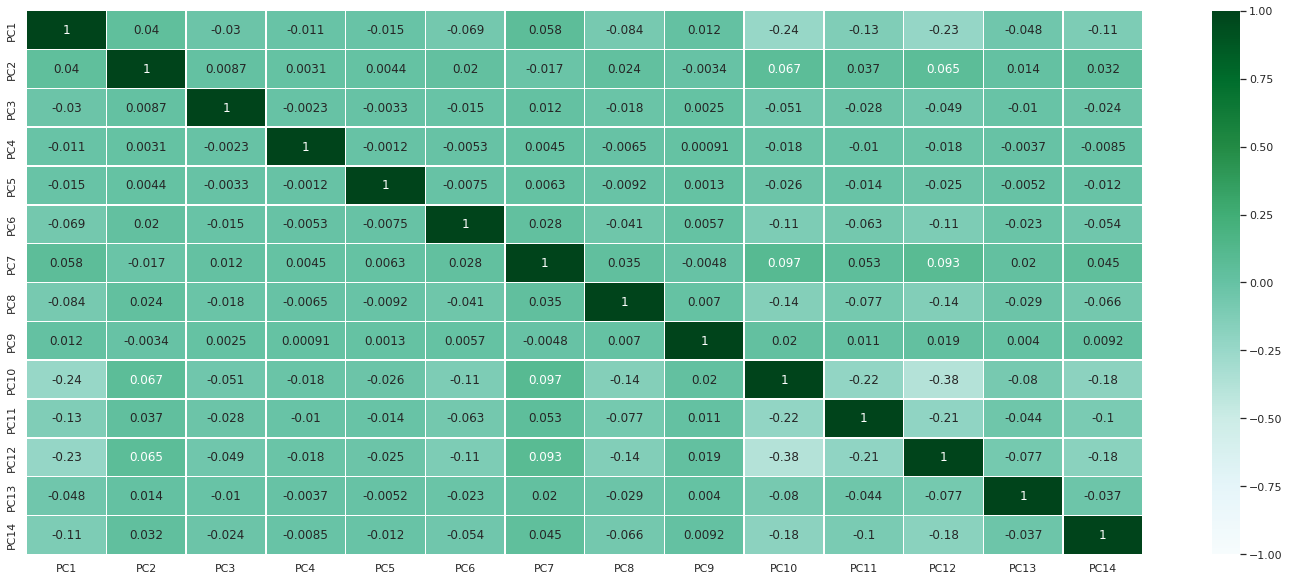

In [35]:
corrs = data.corr()

sns.set(rc = {'figure.figsize':(25,10)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True, linewidths = 0.5)

In [36]:
Varience = np.cov(data)
Varience

array([[ 3.26686859e-02, -1.27969894e-02,  5.90756430e-03,
        -1.48966110e-02, -1.83589118e-02, -1.17902190e-02,
        -7.07951691e-03, -1.87827389e-02, -2.32758433e-03,
        -4.46678916e-03, -1.09070829e-02, -9.38426141e-04,
         9.87387581e-04,  4.34663665e-05],
       [-1.27969894e-02,  7.32225868e-02,  1.70828331e-03,
        -4.30763523e-03, -5.30882460e-03, -3.40936354e-03,
        -2.04717545e-03, -5.43138218e-03, -6.73064782e-04,
        -1.29165609e-03, -3.15398814e-03, -2.71363567e-04,
         2.85521688e-04,  1.25691173e-05],
       [ 5.90756430e-03,  1.70828331e-03,  7.61344701e-02,
         1.98856397e-03,  2.45075007e-03,  1.57388849e-03,
         9.45052014e-04,  2.50732719e-03,  3.10711633e-04,
         5.96276291e-04,  1.45599775e-03,  1.25271473e-04,
        -1.31807386e-04, -5.80237009e-06],
       [-1.48966110e-02, -4.30763523e-03,  1.98856397e-03,
         7.19086814e-02, -6.17985157e-03, -3.96874303e-03,
        -2.38305866e-03, -6.32251737e-03, -7.

In [37]:
total = 0
for i in range(0,len(data.columns)-1):
  total = total + Varience[i][i]
print('Varianza Total \t\t\t:', total.round(2))
min_val = total
minv_str = ''
max_val = 0
maxv_str = ''
x_val = 0
for i in range(0, len(data.columns)-1):
  x_val = ((Varience[i][i]/total) * 100).round(2)
  str_val = str(data.columns[i])
  if x_val > max_val:
    max_val = x_val
    maxv_str = data.columns[i]
  elif x_val < min_val:
    min_val = x_val
    minv_str = data.columns[i]
  print('Varianza promedio de ' + str_val + ': ' + str(x_val) + '%' )

print('El valor minimo es: ' + str(min_val) + '% en ' + minv_str)
print('EL valor maximo es: ' + str(max_val) + '% en ' + maxv_str)

Varianza Total 			: 0.92
Varianza promedio de PC1: 3.54%
Varianza promedio de PC2: 7.93%
Varianza promedio de PC3: 8.25%
Varianza promedio de PC4: 7.79%
Varianza promedio de PC5: 7.51%
Varianza promedio de PC6: 7.99%
Varianza promedio de PC7: 8.21%
Varianza promedio de PC8: 7.47%
Varianza promedio de PC9: 8.32%
Varianza promedio de PC10: 8.28%
Varianza promedio de PC11: 8.04%
Varianza promedio de PC12: 8.33%
Varianza promedio de PC13: 8.33%
El valor minimo es: 0.9230769657692968% en 
EL valor maximo es: 8.33% en PC12


Donde podemos ver que, de las variables, la de mayor importancia es PC12 con un 8.33%.

In [39]:
# Y ahora utilizamos el método de PCA
pcs = PCA()
pcs.fit(data)

PCA()

Presentamos la variación estándar, la proporción de la variancia, y la proporción cumulativa en base los componentes principales

In [40]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,0.2774,0.2774,0.2774,0.2774,0.2774,0.2774,0.2774,0.2774,0.2774,0.2774,0.2774,0.2774,0.2774,0.0
Proportion of variance,0.0769,0.0769,0.0769,0.0769,0.0769,0.0769,0.0769,0.0769,0.0769,0.0769,0.0769,0.0769,0.0769,0.0
Cumulative proportion,0.0769,0.1538,0.2308,0.3077,0.3846,0.4615,0.5385,0.6154,0.6923,0.7692,0.8462,0.9231,1.0000,1.0


Con base en la razón acumulada, estimamos cuántos componentes principales se necesitan para dar cuenta de más del 70% de la variación.

2. **Indica la importancia de las variables en cada componente.**

In [41]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = data.columns
                                )
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
PC1,0.000000,-0.000000,0.936211,0.000000,-0.000000
PC2,-0.032998,0.112194,0.040046,0.387754,-0.043500
PC3,0.023677,-0.272340,-0.030231,-0.615122,-0.106592
PC4,-0.465599,-0.057438,-0.010901,-0.231781,0.234198
PC5,-0.346413,-0.072997,-0.015419,-0.024890,-0.760146
PC6,-0.380117,-0.276284,-0.067455,0.181027,0.362496
PC7,0.004311,0.617925,0.057142,-0.023677,0.148831
PC8,-0.003690,0.182338,-0.082187,-0.092451,-0.010991
PC9,-0.566939,-0.054436,0.011763,0.148625,0.044447
PC10,0.090642,0.158815,-0.199551,0.081036,0.235147


Ahora se estiman las variables con  mayor valor absoluto de los coeficientes PC1 a PC5

In [42]:
for pc in pcsComponents_df.iloc[:,:5]:
  print('Top 3 variables con mayores coeficientes en magnitud de: ' + pc)
  indexes_abs = pcsComponents_df[pc].abs().nlargest(3).index
  individual_pc = pcsComponents_df[pc]
  print(individual_pc[indexes_abs])

Top 3 variables con mayores coeficientes en magnitud de: PC1
PC9   -0.566939
PC4   -0.465599
PC6   -0.380117
Name: PC1, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC2
PC7     0.617925
PC14    0.537734
PC6    -0.276284
Name: PC2, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC3
PC1     0.936211
PC10   -0.199551
PC12   -0.194020
Name: PC3, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC4
PC3    -0.615122
PC2     0.387754
PC13    0.357481
Name: PC4, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC5
PC5    -0.760146
PC6     0.362496
PC13   -0.273229
Name: PC5, dtype: float64


Donde vemos las 3 variables que tienen mayor tamaño de cada componente principal

# 8.**Elabora los histogramas de los atributos para visualizar su distribución**

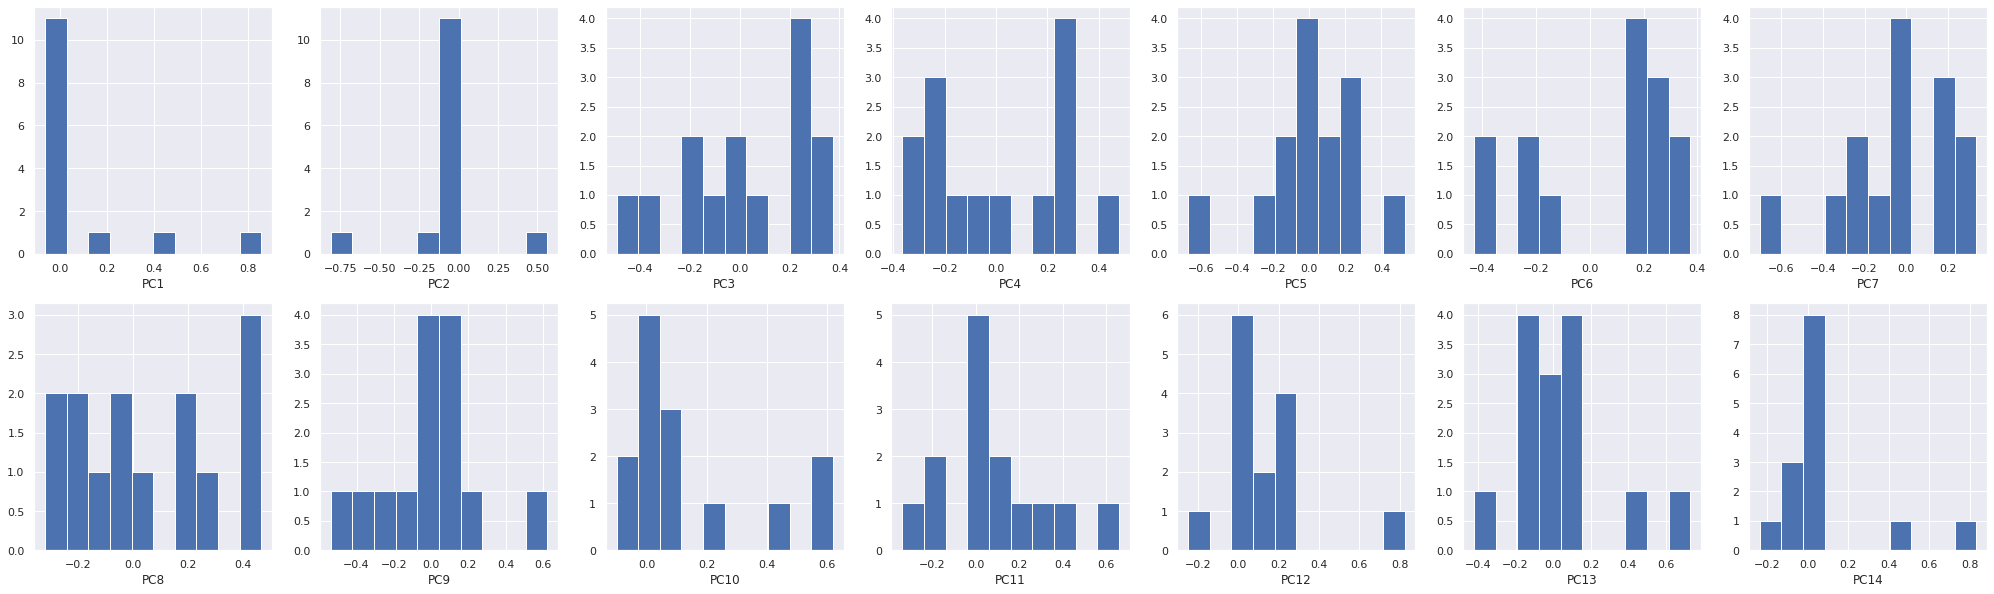

In [43]:
sns.set(rc = {'figure.figsize':(35,10)})
fig, axes = plt.subplots(2, 7)
i = 0
for col in data.columns:
  plt.subplot(2, 7, i+1) 
  plt.hist(data[col], bins = 10) 
  plt.xlabel(data.columns[i])
  i = i + 1

Vemos los histogramas de los componentes principales:

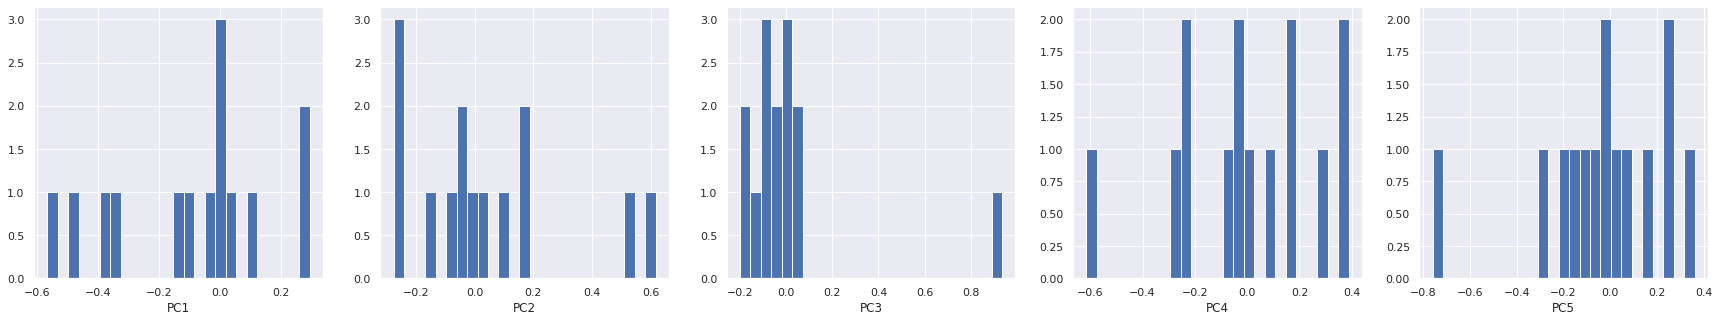

In [44]:
sns.set(rc = {'figure.figsize':(30,5)})
fig, axes = plt.subplots(1, 5)
i = 0
for pc in pcsComponents_df.iloc[:,:5]:
  plt.subplot(1, 5, i+1) 
  plt.hist(pcsComponents_df[pc], bins = 25) 
  plt.xlabel(pcsComponents_df.columns[i])
  i = i + 1

# 9.**Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.**

Veamos los diagramas de bigote de los datos numéricos:

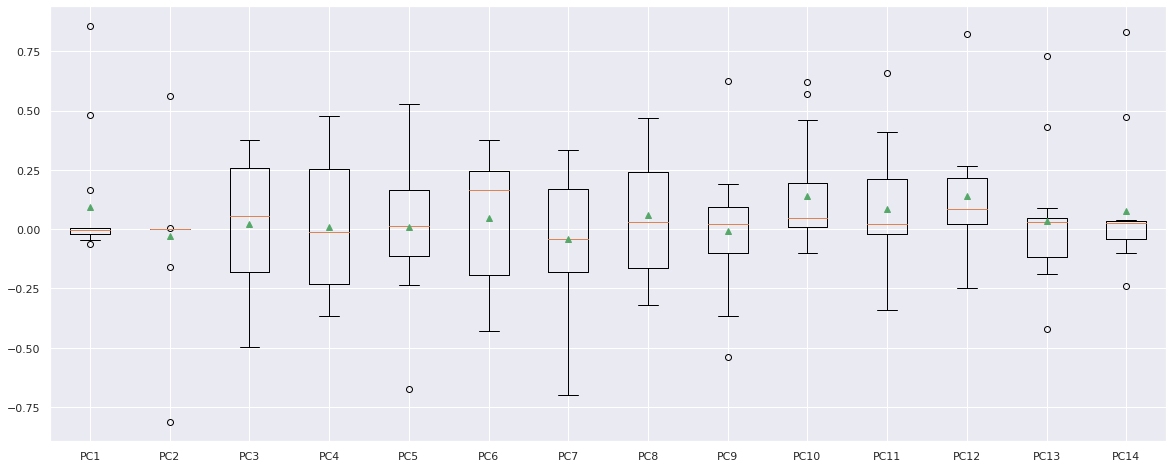

In [45]:
sns.set(rc = {'figure.figsize':(20,8)})

bppc = list()
for col in data.columns:
  rr = data[col]
  bppc.append(rr)

plt.boxplot(bppc, labels = data.columns, showmeans = True)

plt.show()

De lo cual podemos ver que hay muchas anomalías. Sería conveniente aplicar algún tipo de transformación para normalizar los datos.

Veamos los diagramas de bigote de los componentes principales:

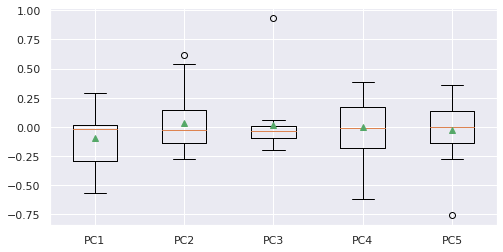

In [46]:
sns.set(rc={'figure.figsize':(8,4)})

bppc = list()
for pc in pcsComponents_df.iloc[:,:5]:
  rr = pcsComponents_df[pc]
  bppc.append(rr)

plt.boxplot(bppc, labels=pcsComponents_df.columns[0:5], showmeans=True)

plt.show()

Como vemos que PC3, PC y PC5 tienen valores atípicos.

Para ver mejor su distribución, podemos graficar las variables categóricas en gráficos circulares:

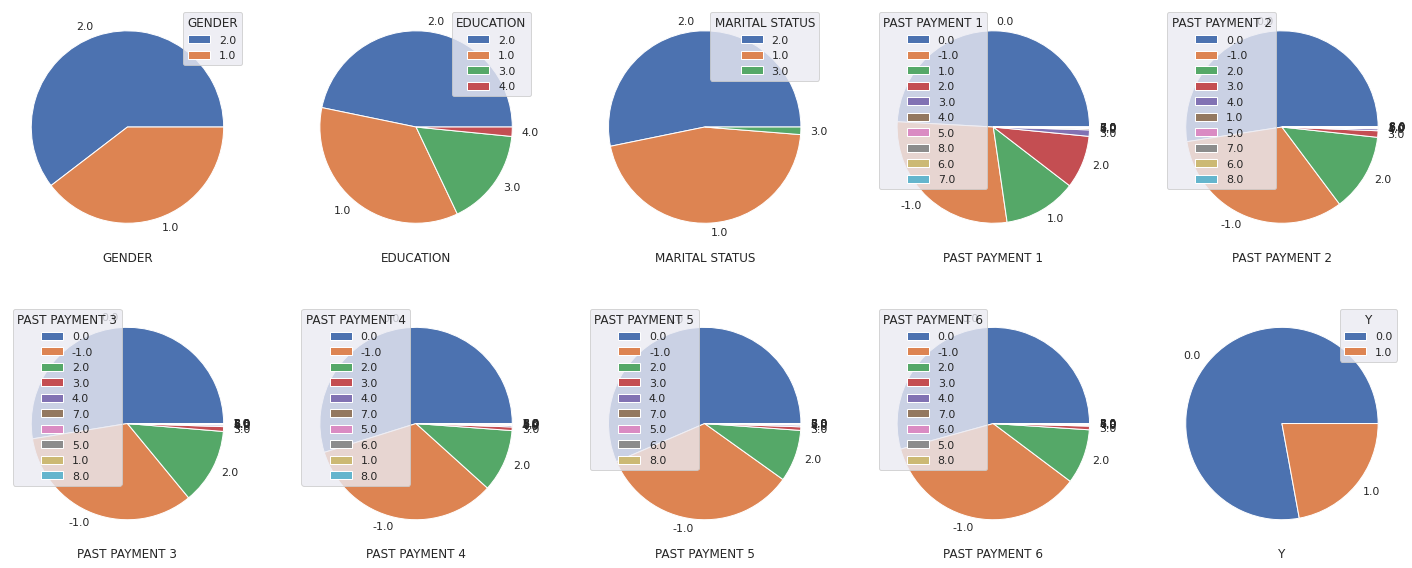

In [47]:
sns.set(rc={'figure.figsize':(25,10)})
fig, axes = plt.subplots(2, 5)
i = 0
for col in df_norm[cat_nom].columns:
  plt.subplot(2, 5, i+1)
  plt.pie(df_norm[col].value_counts(),labels = df_norm[col].value_counts().index.tolist())
  plt.legend(title = col)
  plt.xlabel(df_norm[cat_nom].columns[i])
  i = i + 1

De manera similar, las variables categóricas se pueden ver usando gráficos de barras:

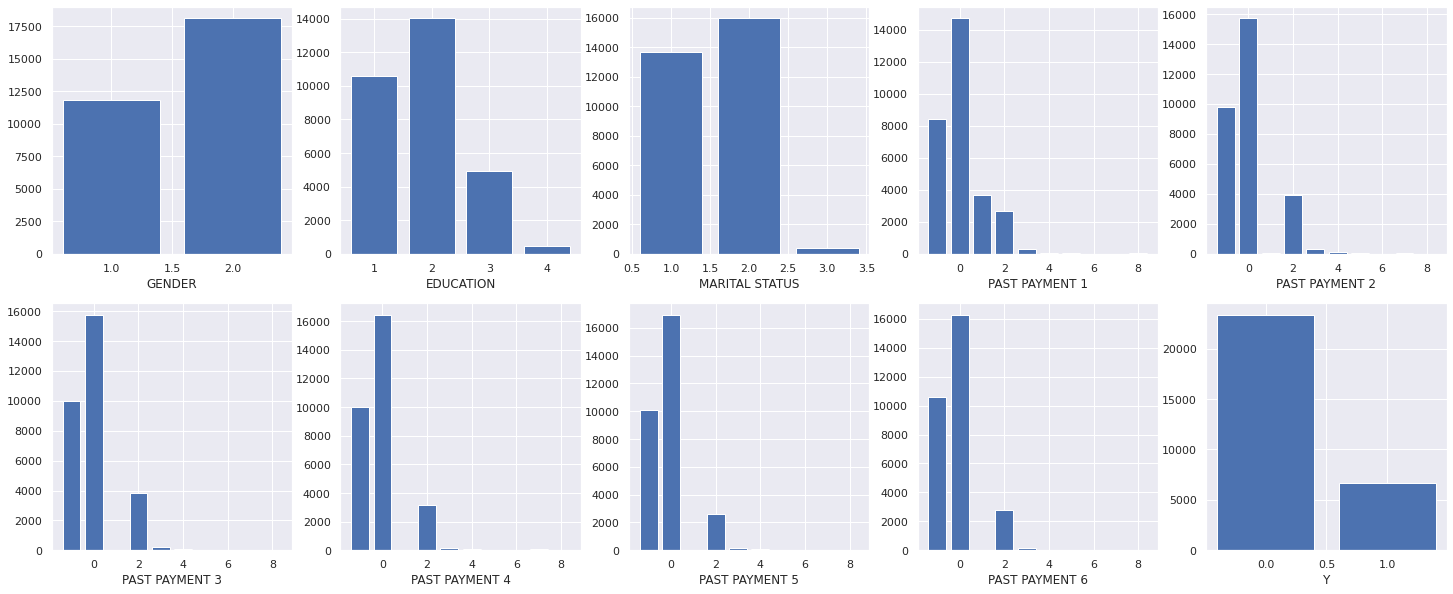

In [48]:
sns.set(rc={'figure.figsize':(25,10)})
fig, axes = plt.subplots(2, 5)
i = 0
for col in df_norm[cat_nom].columns:
  plt.subplot(2, 5, i+1)
  plt.bar(df_norm[col].value_counts().index.tolist(), df_norm[col].value_counts())  
  plt.xlabel(df_norm[cat_nom].columns[i])
  i = i + 1

Graficamos pairplot para ver la relación entre cada variable numérica:

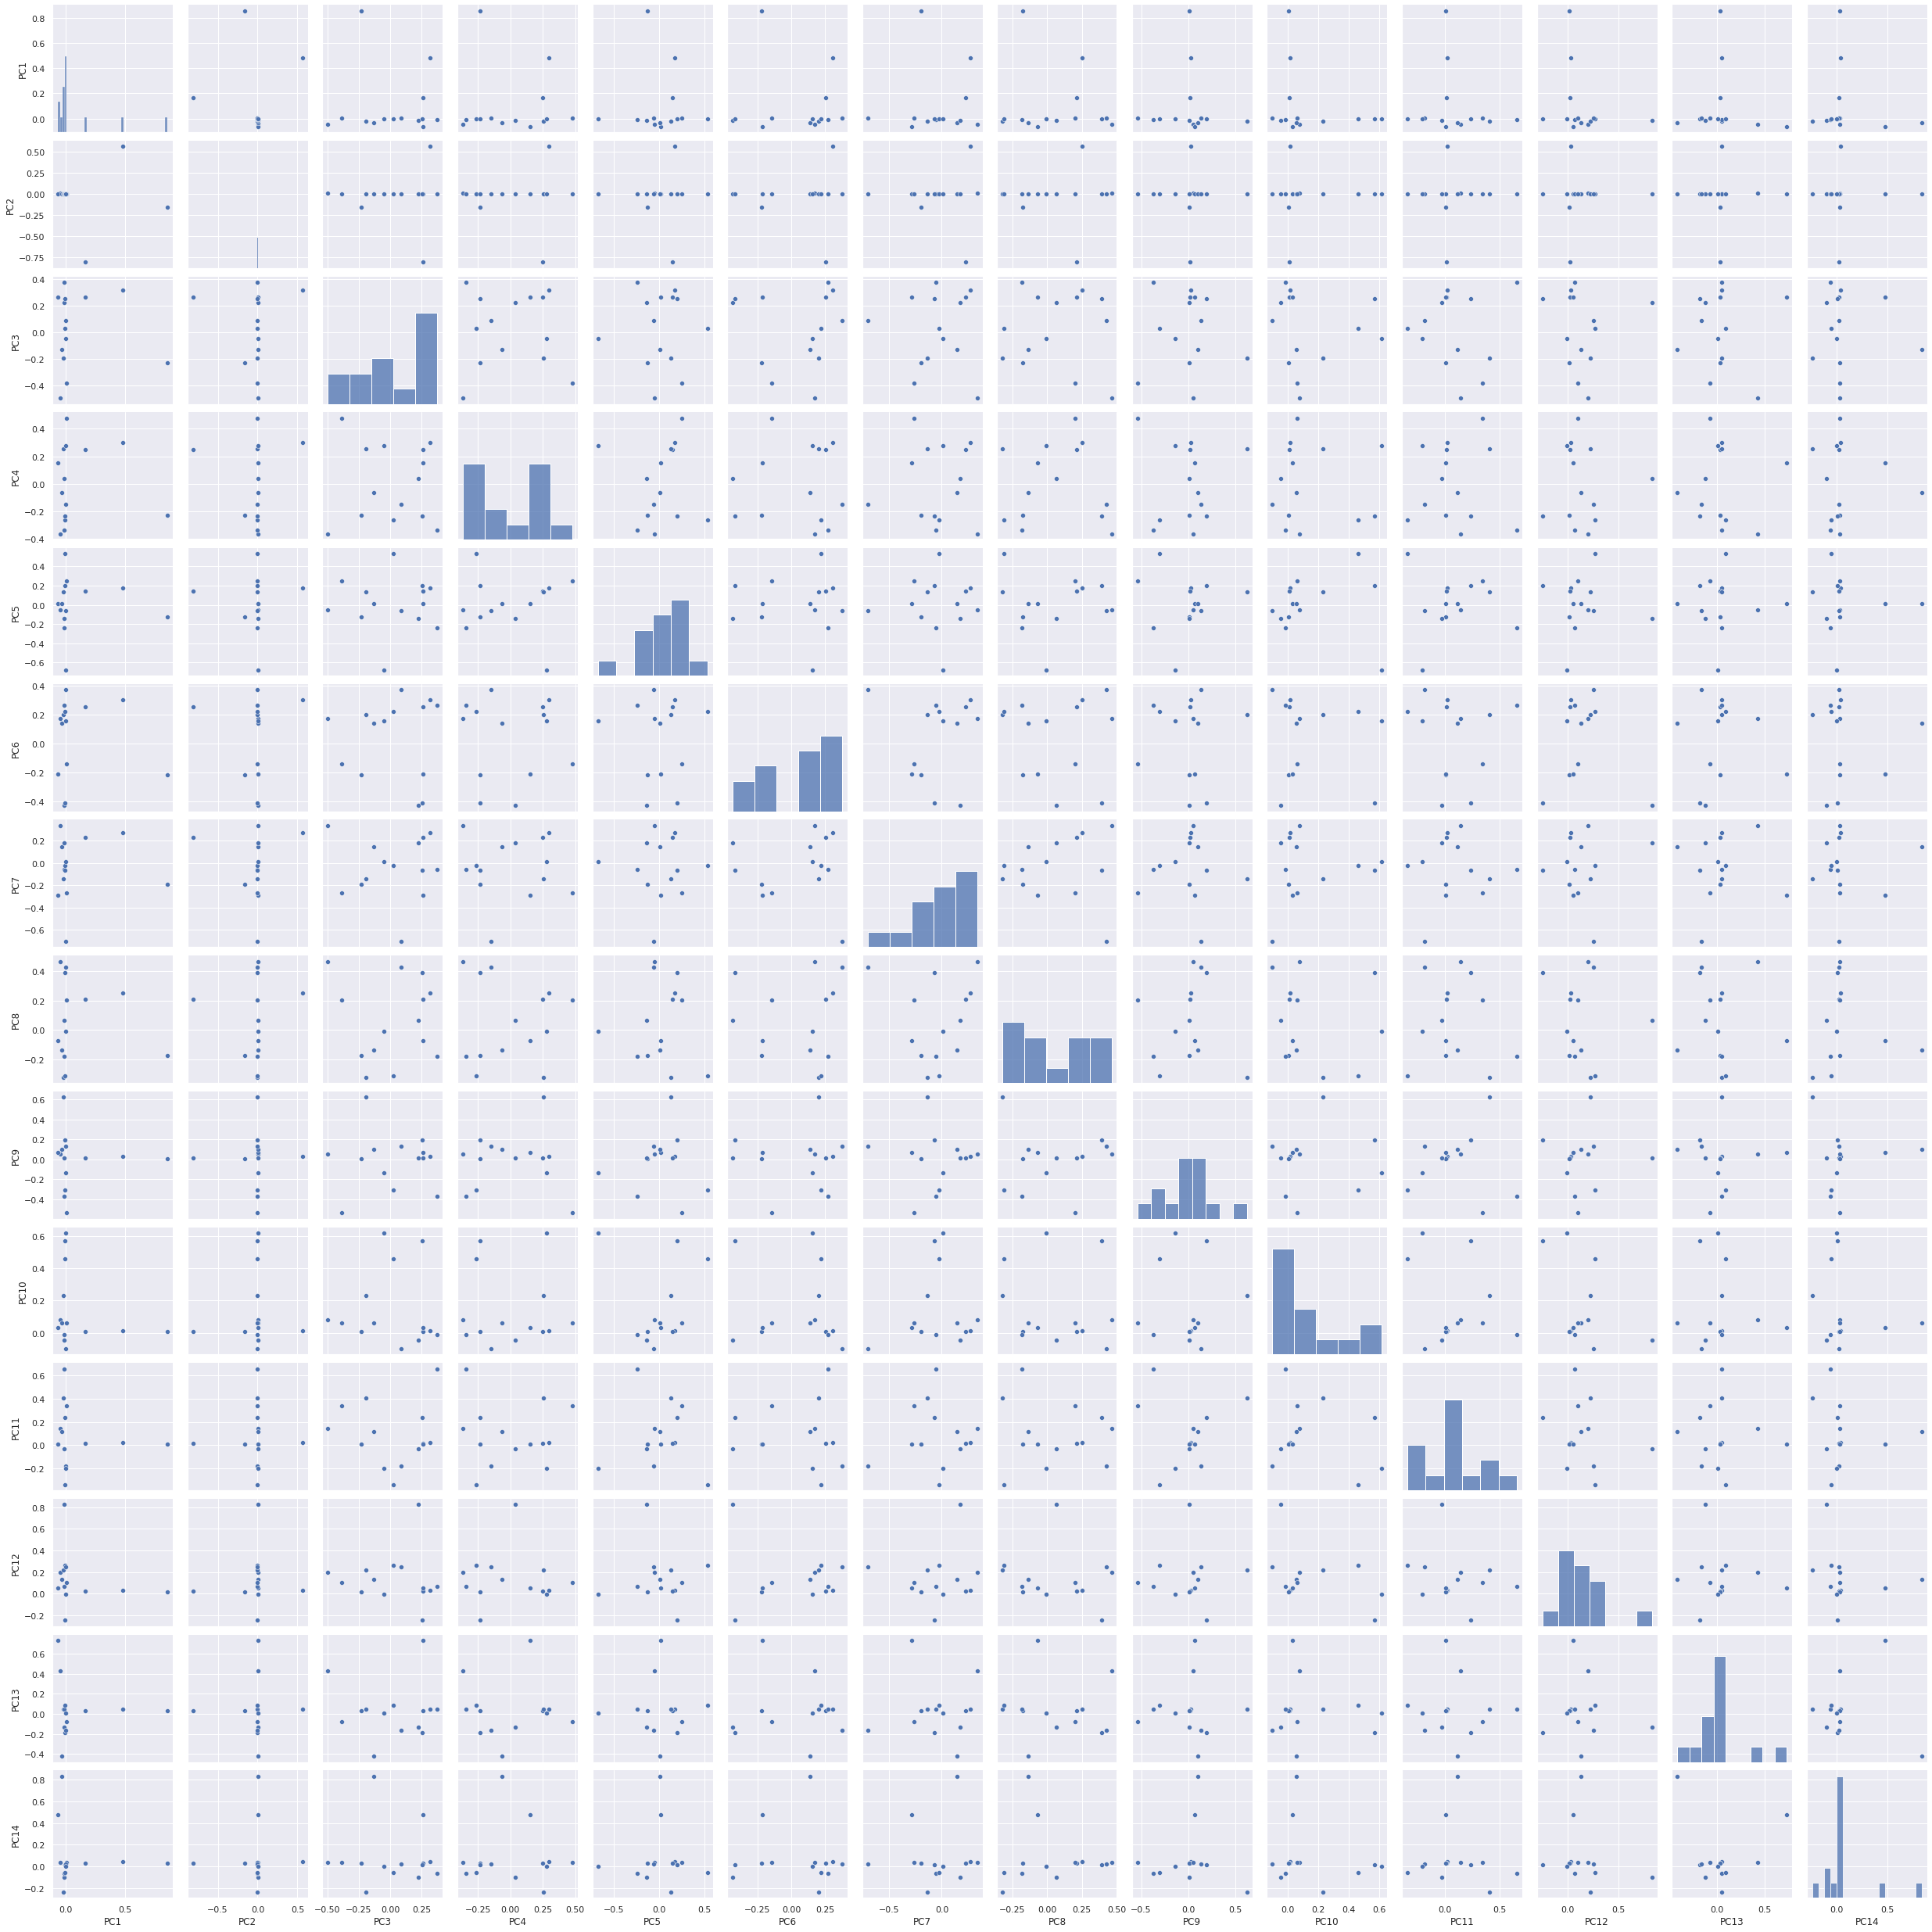

In [49]:
sns.pairplot(data)

# 10.**Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.**

Analizando los histogramas de todas las variables numéricas, vemos que casi todas tienen un sesgo. Esto nos dice que podrían beneficiarse de transformaciones numéricas que intenten normalizarlos a una distribución gaussiana. Y así es posible crear un mejor modelo de pronóstico. 

Los diagramas de bigote nos muestran muchos valores atípicos. Lo que nos dice que tenemos que encontrar formas de tratarlos o reducirlos para crear un buen modelo sin problemas con su interpretación. 

Los gráficos circulares nos permiten ver para cada variable categórica una representación gráfica de sus posibles valores en relación con ellos. Así, es posible ver qué valores de unas mismas variables son mínimos frente a otros; y así se pueden tomar decisiones sobre ellos. 

Otra forma de visualizar lo mencionado en el punto anterior son los gráficos de líneas. 

Finalmente, un diagrama de pares le permite visualizar las relaciones entre cada variable en un conjunto de datos. Así, es posible ver gráficamente la importancia o covarianza de cada variable con respecto a otra. Nos da las herramientas para tomar decisiones.